> # **Tercer Parcial - Métodos Computacionales.**
Trabajo hecho por: Claudia Alejandra Cuellar Nieto & Thomas Andrade Hernández.

In [52]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import sympy as sym
from tqdm import tqdm
import matplotlib.pyplot as plt

> **El Fractal de Newton:**

$\verb|(Problema de Cayley y los fractales 1879)|$ ¿Si se parte de un punto aleatorio del plano complejo, a qué raíz de la función $f(z) = z^{3} - 1$ (donde $z = x + iy$) converge el método generalizado de Newton-Raphson?. Esta función tiene las siguientes raíces $f(zi) = 0$, $i = 0, 1, 2$:
$$z_{0} = -\frac{1}{2} + \frac{\sqrt{3}}{2} i$$
$$z_{1} = -\frac{1}{2} - \frac{\sqrt{3}}{2} i$$
$$z_{2} = 1 + 0 i$$
La aplicación del método de generalizado de Newton al polinomio $f(z) = z^{3} - 1$ genera una frontera en el plano complejo denominada fractal de Newton.

In [27]:
x, y = sym.symbols('x, y', real = True)
z = x + sym.I*y

function = lambda z: z**3 - 1
F = [sym.re(function(z)), sym.im(function(z))]
J = [[sym.diff(F[0],x), sym.diff(F[0],y)],[sym.diff(F[1],x),sym.diff(F[1],y)]]
sym.Matrix(J)

Fn = sym.lambdify([x, y], F, 'numpy')
Jn = sym.lambdify([x, y], J, 'numpy')

def NewtonRhapson(z0, Fn, Jn, max_it = 10000, tol = 1e-7):
    for it in range(max_it):
        if np.linalg.det(Jn(z0[0], z0[1])) != 0:
            Jn_1 = np.linalg.inv(Jn(z0[0], z0[1]))
            Fn_1 = Fn(z0[0], z0[1])
            zn = z0 - np.dot(Jn_1, Fn_1)
        if np.linalg.norm(zn - z0) < tol:
            break
        else:
            z0 = zn
    return z0

NewtonRhapson([0.5, 0.5], Fn, Jn)

array([-0.49999997,  0.86602543])

100%|██████████| 300/300 [02:34<00:00,  1.94it/s]


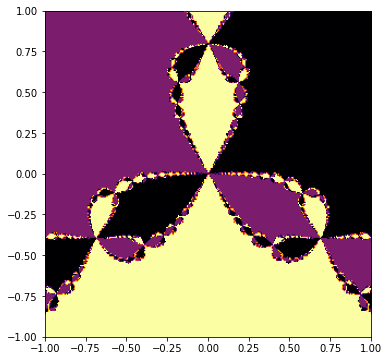

In [59]:
N = 300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
z_roots = np.array([[-0.5, np.sqrt(3)*0.5], [-0.5, -np.sqrt(3)*0.5], [1, 0]])
index = [20, 100, 255]
Fractal = np.zeros((N, N), np.int64)

for i in tqdm(range(len(x))):
    for j in range(len(y)):
        z = NewtonRhapson([x[i], y[j]], Fn, Jn)
        for k, root in enumerate(z_roots):
            if np.linalg.norm(z - root) < 1e-7:
                Fractal[i, j] = index[k]

plt.figure(figsize = (6,6))
plt.imshow(Fractal, cmap = 'inferno', extent=[-1,1,-1,1])